# Binary classification to predict the Efficacy of an active G9a inhibitor, using Dataset 3

### Content   <a name="content"></a>

1. [Data loading and observations](#1)
2. [Creating the threshold](#2)
3. [Balansing the dataset](#3)
4. [Machine Learning binary classification](#4)
5. [Cros-validation](#5)
6. [Scrutinising for overfitting](#6)
7. [Feature importance methods for the Random Forest Classifier](#7)
8. [Comparison of the first eleven features of the feature permutation importance](#8)
9. [Hyper-parameter  tuning of RFC with four-feature dataset](#9)
10. [Scrutinising for  overfitting of the four-feature model](#10)
11. [Confusion matrix and classification report of RFC with four-feature dataset](#11)
12. [Illustration of the four-feature model results](#12)
13. [Machine Learning with molecular weight data only](#13)
14. [Scrutinising for  overfitting of the molecular weight model](#14)
15. [Confusion matrix and classification report of RFC with molecular weight data](#15)
16. [Illustration of the molecular weight model results](#16)
17. [Machine Learning with the water solubility data only](#17)
18. [Scrutinising for  overfitting of the water solubility data model](#18)
19. [Confusion matrix and classification report of RFC with water solubility data](#19)
20. [Illustration of the water solubility model results](#20)

### Data loading and observations <a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_Efficacy_with_solub_and_imputation.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (5310, 61)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
0,125.832,337.40,94.2,22.9,24,1,5,5,1,7.4631,8.6021,19.963043,19.881405,10.1174,11.2860,20.047873,20.324161,1.235937,2.285504e-03,9.8034,12.2149,19.935856,19.808128,6.1795,8.7580,20.405029,20.203442,3.1598,4.9744,19.952756,19.824369,127.312374,21.047793,20.379100,20.585478,0.44,0.38,0.03,0.03,0.13,0.0,0.00,0.0,60.52,4.48,4.74,9.50,20.76,0.0,0.00,0.0,20.737650,20.762192,1.586439,1.394713,3.102538,2.455552,1.955662,1.760614,20.045,22.200000
1,159.927,391.50,145.0,23.2,25,1,7,4,1,13.3389,13.3389,19.986803,19.931411,9.3818,9.3818,19.996973,19.950942,0.000000,2.283697e-09,13.3236,15.4208,20.054043,20.208981,5.1669,7.5494,20.607818,20.344061,2.3667,4.2663,19.237999,19.434229,90.088600,20.405571,20.041752,20.316693,0.42,0.34,0.08,0.08,0.08,0.0,0.00,0.0,49.09,3.35,12.26,24.57,10.73,0.0,0.00,0.0,21.421785,21.421785,2.578645,2.042652,5.629611,3.614561,2.183166,1.769543,20.049,17.960556
2,154.866,293.34,78.7,21.6,20,0,4,5,1,10.3905,11.4264,20.051936,19.758394,5.2570,7.9578,19.523062,19.353399,38.342612,4.282801e-01,10.1478,13.3207,19.611802,19.984691,4.2735,5.6810,19.471141,19.557996,2.3743,4.2323,19.915592,19.927372,68.849533,20.104155,20.202745,20.029847,0.40,0.43,0.11,0.03,0.03,0.0,0.00,0.0,57.32,5.15,21.82,10.93,4.78,0.0,0.00,0.0,21.976508,21.435874,2.374588,2.344781,4.274018,3.147390,1.799899,1.342296,20.036,21.000000
3,133.107,330.40,92.5,22.5,23,1,4,5,1,10.8520,11.8925,19.840402,20.131367,9.0951,9.0951,20.183336,19.753316,0.083054,2.191694e-04,10.2961,11.5105,20.177121,19.972704,6.6456,8.9003,19.247888,19.638222,2.7422,4.8784,20.251344,20.075438,34.212505,20.028410,20.175722,20.149538,0.39,0.44,0.05,0.02,0.10,0.0,0.00,0.0,58.16,5.49,9.68,9.70,16.96,0.0,0.00,0.0,21.193170,21.307572,1.549311,1.293271,3.754686,2.359483,2.423456,1.824430,20.044,24.000000
4,140.597,318.78,107.0,22.1,20,1,5,7,1,14.0384,14.0384,20.469512,20.179811,3.0000,4.2000,20.946284,20.171131,0.195432,1.260465e-01,13.1925,14.8555,20.502508,19.944113,2.4826,5.4797,19.864594,19.969737,1.6693,3.3826,20.327390,19.912363,72.921198,20.950873,20.731400,20.737462,0.34,0.43,0.11,0.03,0.06,0.0,0.03,0.0,45.21,4.74,20.08,10.06,8.79,0.0,11.12,0.0,24.679467,23.342476,5.313985,2.711006,7.903013,4.391740,1.487210,1.619967,20.062,38.000000


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5310 entries, 0 to 5309
Data columns (total 61 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Efficacy              5310 non-null   float64
 1   MW                    5310 non-null   float64
 2   TPSA                  5310 non-null   float64
 3   XL                    5310 non-null   float64
 4   HAC                   5310 non-null   int64  
 5   HBDC                  5310 non-null   int64  
 6   HBAC                  5310 non-null   int64  
 7   RBC                   5310 non-null   int64  
 8   CBUC                  5310 non-null   int64  
 9   MMX6                  5310 non-null   float64
 10  MMX                   5310 non-null   float64
 11  SX6                   5310 non-null   float64
 12  SX                    5310 non-null   float64
 13  MMY6                  5310 non-null   float64
 14  MMY                   5310 non-null   float64
 15  SY6                   5310

In [5]:
# Stats
df.describe(include="all")

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4
count,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.00000,5310.000000,5310.000000,5310.0,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5.310000e+03,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000,5310.000000
mean,132.303232,318.748822,83.631141,22.849887,22.181544,1.30904,4.545009,3.987194,1.0,9.980930,10.638028,20.025677,20.023534,8.484624,9.080851,19.958309,19.981974,7.966257e+00,4.763825e-02,10.533911,12.595858,20.009314,20.010952,4.925638,6.966872,19.997542,19.997589,2.490603,4.254746,19.997092,19.996234,6.585178e+01,20.456086,20.786708,20.686421,0.415151,0.416859,0.061030,0.018341,0.077763,0.001254,0.005030,0.004026,60.265209,5.193456,11.476819,6.577866,12.830546,0.929772,1.856098,0.869004,21.412148,21.341961,2.403163,1.905538,128.815280,46.216479,57.200504,25.956369,20.056296,22.695919
std,29.454276,65.295436,33.077178,1.212785,4.661594,0.93868,1.699099,1.970738,0.0,3.176329,3.033890,0.309775,0.275619,3.177327,3.022290,0.369285,0.308950,4.684151e+01,2.663324e-01,2.617596,2.542500,0.325410,0.269524,1.674206,1.595347,0.445613,0.302368,1.205858,1.397154,0.581832,0.401475,8.436849e+01,1.556059,10.335110,9.981879,0.045254,0.065098,0.041377,0.021524,0.039467,0.006542,0.014332,0.016056,9.334322,1.465328,7.328094,7.222684,5.967911,4.682500,4.959285,3.208269,0.965442,0.695266,1.091181,0.600540,886.766056,493.796310,424.076048,294.237612,0.019294,15.055321
min,62.000400,97.070000,0.000000,16.100000,6.000000,0.00000,0.000000,0.000000,1.0,0.714500,2.057200,18.627042,19.106138,0.412500,1.237500,18.657621,18.928861,0.000000e+00,2.260095e-38,1.128300,4.589300,18.534780,18.885661,0.394700,2.878500,17.909794,18.886292,0.000300,0.000500,16.402595,14.612511,3.807599e-07,20.000129,20.000000,20.000007,0.150000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.830000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.158514,20.158514,0.576067,0.798337,1.002917,0.908398,0.260297,0.683794,20.011000,0.100000
25%,111.725750,278.355000,60.800000,22.100000,19.000000,1.00000,3.000000,3.000000,1.0,7.696800,8.580400,19.832558,19.849264,6.273825,6.847100,19.721393,19.776828,1.579800e-18,3.129307e-06,8.713775,10.770700,19.811826,19.839129,3.622100,5.737850,19.729997,19.814467,1.753600,3.494425,19.729226,19.822847,2.824164e+01,20.058451,20.042552,20.042288,0.380000,0.380000,0.030000,0.000000,0.050000,0.000000,0.000000,0.000000,54.095000,4.170000,5.650000,0.000000,8.740000,0.000000,0.000000,0.000000,20.822175,20.843565,1.602426,1.443007,3.091459,2.309794,1.458390,1.317562,20.047000,12.700000
50%,130.844000,313.350000,81.300000,22.900000,22.000000,1.00000,4.000000,4.000000,1.0,9.869550,10.218900,20.007891,20.006990,8.255250,8.934250,19.972450,19.980779,8.281494e-02,3.121274e-04,10.377850,12.402600,20.004781,20.011891,4.799500,6.791200,19.999961,20.000069,2.483100,4.350600,19.999096,19.999072,4.485270e+01,20.149898,20.111048,20.110732,0.420000,0.420000,0.060000,0.020000,0.070000,0.000000,0.000000,0.000000,60.535000,5.085000,11.14000

[<a href="#content">Back to top</a>]

## Create the threshold  <a name="2"></a>

In [6]:
import numpy as np

# Create a list of conditions
conditions = [
    (df['Efficacy'] < 200),
    (df['Efficacy'] >= 200)
]

# Create a lsit of values
values = [0, 1]

# Create a new column, assigning the values according to the conditions
df['target'] = np.select(conditions, values)

# Display the data frame
print('Shape of the df: ', df.shape)
df.head()

Shape of the df:  (5310, 62)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,Solubility_at_pH_7_4,target
0,125.832,337.40,94.2,22.9,24,1,5,5,1,7.4631,8.6021,19.963043,19.881405,10.1174,11.2860,20.047873,20.324161,1.235937,2.285504e-03,9.8034,12.2149,19.935856,19.808128,6.1795,8.7580,20.405029,20.203442,3.1598,4.9744,19.952756,19.824369,127.312374,21.047793,20.379100,20.585478,0.44,0.38,0.03,0.03,0.13,0.0,0.00,0.0,60.52,4.48,4.74,9.50,20.76,0.0,0.00,0.0,20.737650,20.762192,1.586439,1.394713,3.102538,2.455552,1.955662,1.760614,20.045,22.200000,0
1,159.927,391.50,145.0,23.2,25,1,7,4,1,13.3389,13.3389,19.986803,19.931411,9.3818,9.3818,19.996973,19.950942,0.000000,2.283697e-09,13.3236,15.4208,20.054043,20.208981,5.1669,7.5494,20.607818,20.344061,2.3667,4.2663,19.237999,19.434229,90.088600,20.405571,20.041752,20.316693,0.42,0.34,0.08,0.08,0.08,0.0,0.00,0.0,49.09,3.35,12.26,24.57,10.73,0.0,0.00,0.0,21.421785,21.421785,2.578645,2.042652,5.629611,3.614561,2.183166,1.769543,20.049,17.960556,0
2,154.866,293.34,78.7,21.6,20,0,4,5,1,10.3905,11.4264,20.051936,19.758394,5.2570,7.9578,19.523062,19.353399,38.342612,4.282801e-01,10.1478,13.3207,19.611802,19.984691,4.2735,5.6810,19.471141,19.557996,2.3743,4.2323,19.915592,19.927372,68.849533,20.104155,20.202745,20.029847,0.40,0.43,0.11,0.03,0.03,0.0,0.00,0.0,57.32,5.15,21.82,10.93,4.78,0.0,0.00,0.0,21.976508,21.435874,2.374588,2.344781,4.274018,3.147390,1.799899,1.342296,20.036,21.000000,0
3,133.107,330.40,92.5,22.5,23,1,4,5,1,10.8520,11.8925,19.840402,20.131367,9.0951,9.0951,20.183336,19.753316,0.083054,2.191694e-04,10.2961,11.5105,20.177121,19.972704,6.6456,8.9003,19.247888,19.638222,2.7422,4.8784,20.251344,20.075438,34.212505,20.028410,20.175722,20.149538,0.39,0.44,0.05,0.02,0.10,0.0,0.00,0.0,58.16,5.49,9.68,9.70,16.96,0.0,0.00,0.0,21.193170,21.307572,1.549311,1.293271,3.754686,2.359483,2.423456,1.824430,20.044,24.000000,0
4,140.597,318.78,107.0,22.1,20,1,5,7,1,14.0384,14.0384,20.469512,20.179811,3.0000,4.2000,20.946284,20.171131,0.195432,1.260465e-01,13.1925,14.8555,20.502508,19.944113,2.4826,5.4797,19.864594,19.969737,1.6693,3.3826,20.327390,19.912363,72.921198,20.950873,20.731400,20.737462,0.34,0.43,0.11,0.03,0.06,0.0,0.03,0.0,45.21,4.74,20.08,10.06,8.79,0.0,11.12,0.0,24.679467,23.342476,5.313985,2.711006,7.903013,4.391740,1.487210,1.619967,20.062,38.000000,0


In [7]:
df['target'].value_counts()

target
0    5210
1     100
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Balancing data  <a name="3"></a>

In [8]:
# Split the training columns from the columns with the targets and drop the column Efficacy
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[(0, 5210), (1, 100)]


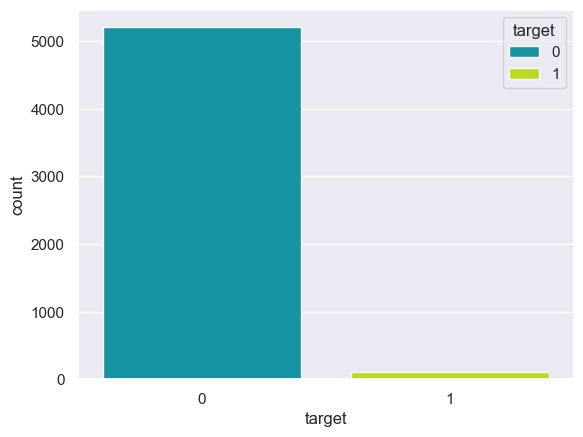

In [9]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

[(0, 5210), (1, 5210)]


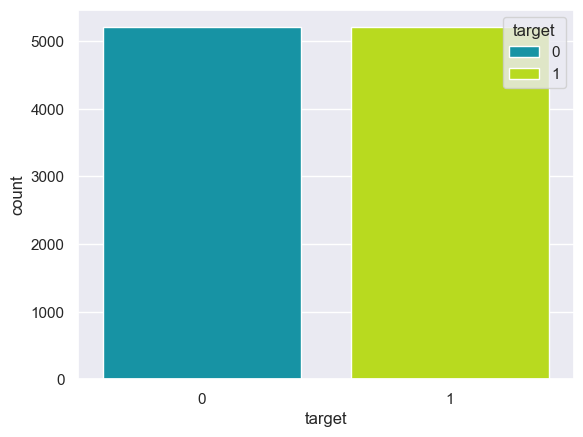

In [10]:
from imblearn.over_sampling import SMOTE

# Balance targets with Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

# Illustrate the balance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## Machine Learning binary classification <a name="4"></a>

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                                      test_size=0.20,
                                                                      random_state=5, 
                                                                      shuffle=True) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (8336, 60)
X_test:   (2084, 60)
y_train:  (8336,)
y_test:   (2084,)


In [12]:
# Check the number of each class in y_test
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1032, 1: 1052}

In [13]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(kernel='rbf', C=1, probability=True),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(),
        "GradientBoost":GradientBoostingClassifier(),
       }

In [14]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
2,RandomForest,0.997,0.996,0.997,0.997,0.997
3,GradientBoost,0.976,0.975,0.976,0.976,0.976
0,SVM,0.974,0.955,0.994,0.974,0.973
1,Decision,0.943,0.926,0.965,0.945,0.943


[<a href="#content">Back to top</a>]

## Cross validation <a name="5"></a>

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
2,RandomForest,0.9945,0.0018,"[0.9923, 0.9947, 0.9957, 0.9971, 0.9928]"
3,GradientBoost,0.9714,0.0114,"[0.9501, 0.9707, 0.9818, 0.9736, 0.9808]"
1,Decision,0.9459,0.0150,"[0.9223, 0.9367, 0.9515, 0.953, 0.9659]"
0,SVM,0.6291,0.0059,"[0.6358, 0.6272, 0.6281, 0.6195, 0.6348]"


In [16]:
# Instantiate the estimator 
model = RandomForestClassifier(random_state=1) 
#  Train the model
model.fit(X_train, y_train)
# Make a prediction
prediction = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of the model with Random forest classifier algorithm is: ", accuracy)

The accuracy of the model with Random forest classifier algorithm is:  0.9956813819577736


[<a href="#content">Back to top</a>]

## Scrutinising for overfitting <a name="6"></a>

In [17]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(#max_features=None,
                                 # max_leaf_nodes=9,
                                 # n_estimators=25,
                                 max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.702, test: 0.683
>2, train: 0.750, test: 0.738
>3, train: 0.811, test: 0.810
>4, train: 0.863, test: 0.849
>5, train: 0.902, test: 0.900
>6, train: 0.932, test: 0.929
>7, train: 0.952, test: 0.947
>8, train: 0.966, test: 0.959
>9, train: 0.978, test: 0.972
>10, train: 0.979, test: 0.972
>11, train: 0.984, test: 0.977
>12, train: 0.986, test: 0.983
>13, train: 0.989, test: 0.986
>14, train: 0.992, test: 0.989
>15, train: 0.993, test: 0.991
>16, train: 0.995, test: 0.993
>17, train: 0.995, test: 0.990
>18, train: 0.995, test: 0.993
>19, train: 0.996, test: 0.992
>20, train: 0.997, test: 0.995


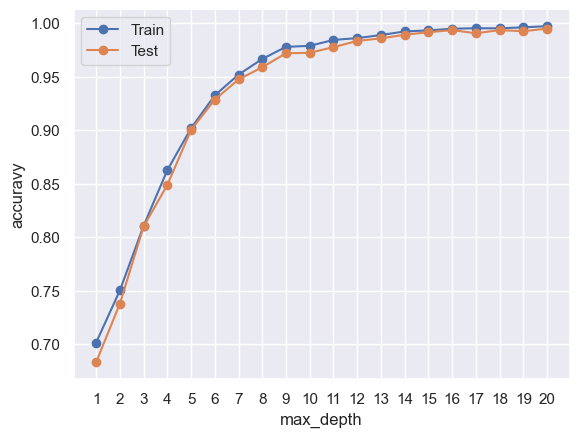

In [18]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Feature importance methods for the Random Forest Classifier <a name="7"></a>

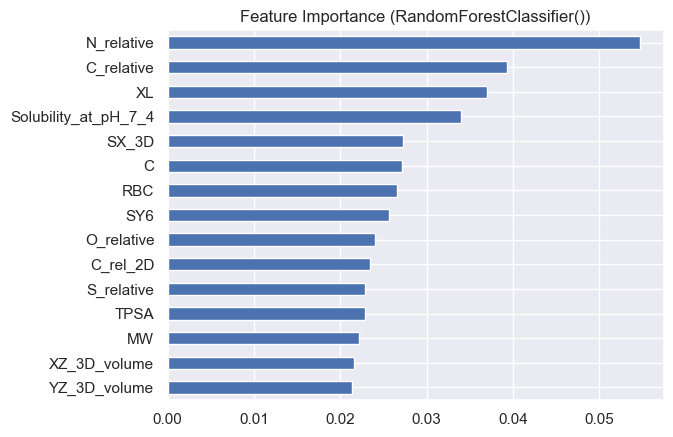

In [19]:
import matplotlib.pyplot as plt

model = RandomForestClassifier().fit(X_train, y_train)

# Define feature importance of RandomForestClassifier 
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.nlargest(15).sort_values()

# Plot feature importance of RandomForestClassifier 
feat_imp.plot(kind="barh", title="Feature Importance ({:})".format(model))
plt.show()

Text(0.5, 0, 'Permutation Importance')

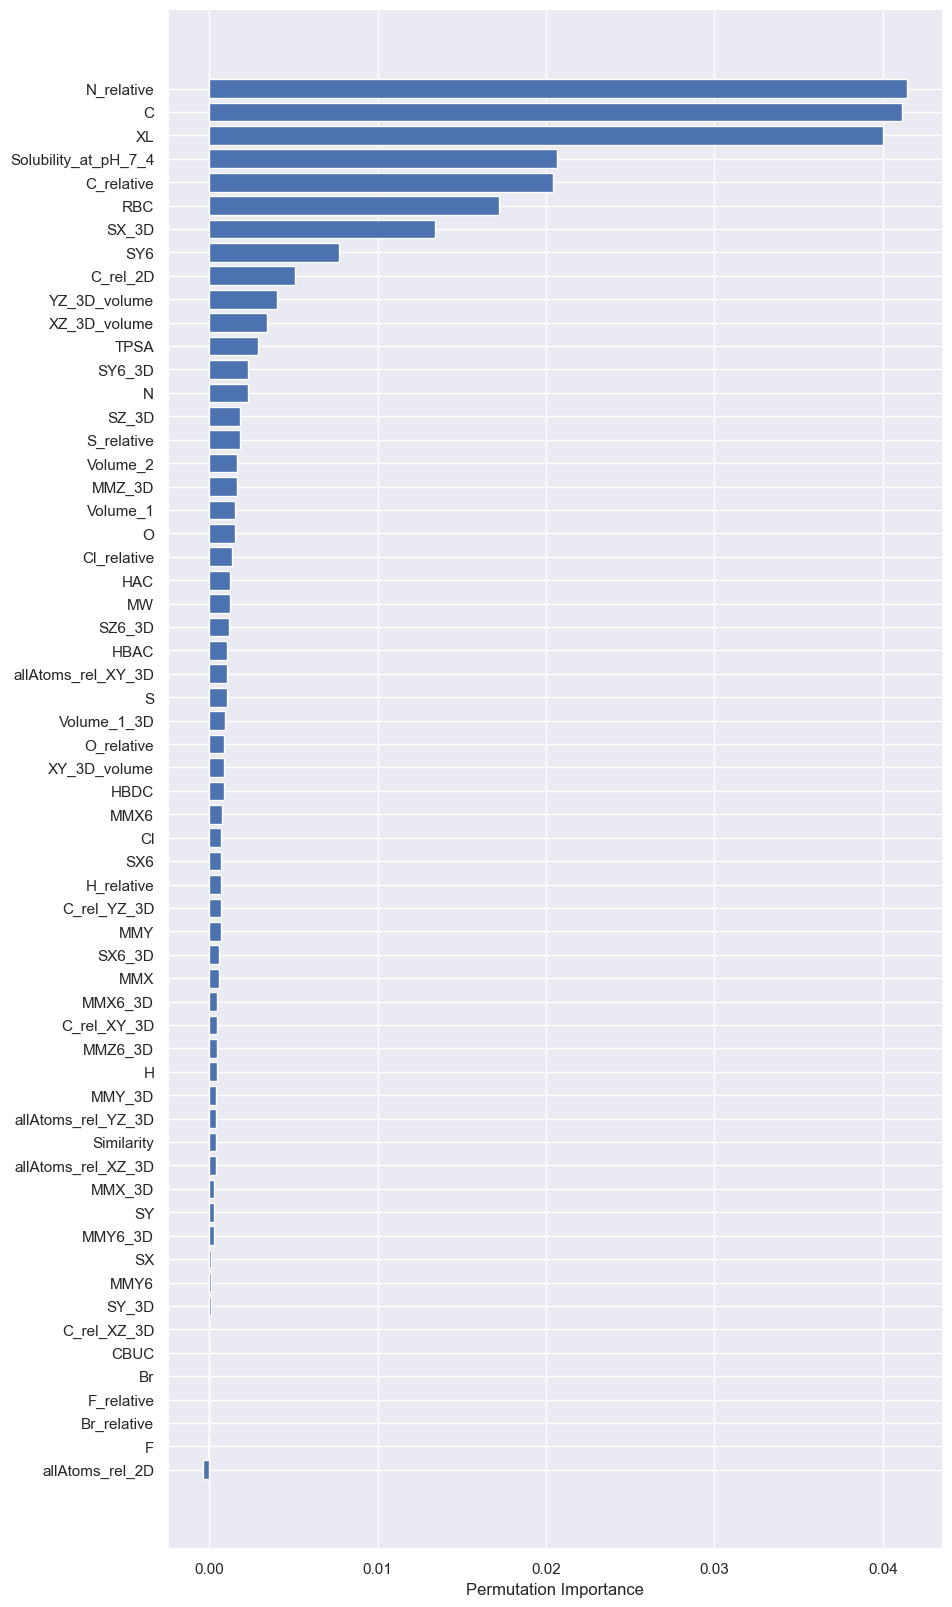

In [20]:
from sklearn.inspection import permutation_importance

feature_names = list(X)

# Convert the list into an array
features = np.array(feature_names)

# Calculate the permutation feature importance
perm_importance = permutation_importance(model, X_test, y_test,
                                         scoring='neg_mean_absolute_error',
                                         random_state=0)

# Sort the result
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation feature importance
plt.figure(figsize=(10,20))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

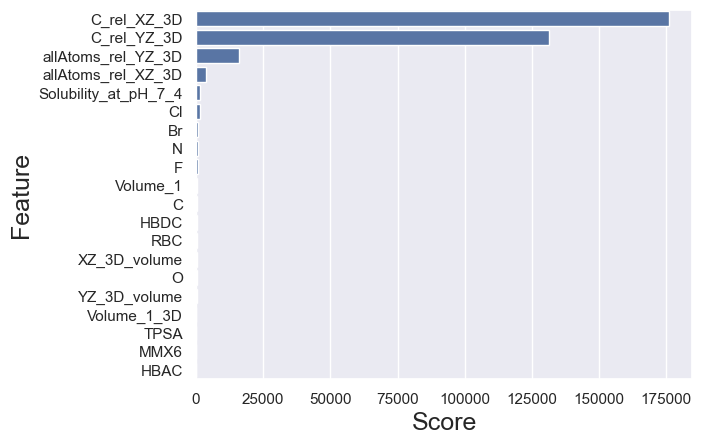

In [21]:
from sklearn.feature_selection import SelectKBest, chi2 
import seaborn as sns

# Feature selection 
sf = SelectKBest(chi2, k='all')

# Run score function on (X, y) and get the appropriate features.
sf_fit = sf.fit(X, y)

# Plot the scores
datset = pd.DataFrame()
datset['feature'] = X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=False)
datset = datset.head(20) # Top 20 features 
sns.barplot(x=datset['scores'], y=datset['feature'])
sns.set_style('whitegrid')
plt.ylabel('Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

[<a href="#content">Back to top</a>]

## Comparison of the first eleven features of the feature permutation importance  <a name="8"></a>

In [22]:
import numpy as np
from sklearn import metrics

# Feature importance
X_reduced = X[['N_relative',              # 0.9242
               'XL',                      # 0.9606
               'Solubility_at_pH_7_4',    # 0.9481
               'C_relative',              # 0.9726
               # 'C',                      # 0.9774
               # 'SY6',                    # 0.9779                                                 
               # 'SX_3D',                  # 0.9736
               # 'RBC',                    # 0.9779
               # 'MW',                     # 0.9822
               # 'TPSA',                   # 0.9827
               # 'O_relative'              # 0.9846
]]
    
# Feature permutation importance
# X_reduced = X[['XL',                     # 0.964
               # 'C',                      # 0.869
               # 'Solubility_at_pH_7_4',   # 0.8728
               # 'C_relative',             # 0.964
               # 'SX_3D',                  # 0.9688
               # 'N_relative',             # 0.9798
               # 'RBC',                    # 0.9818
               # 'SY6',                    # 0.975
               # 'C_rel_2D',               # 0.9789
               # 'XZ_3D_volume',           # 0.9818
               # 'MW'                      #0.9866
# ]]

# # Feature permutation importance
# X_reduced = X[['C_rel_XZ_3D',              # 0.5365
               # 'C_rel_YZ_3D',              # 0.6569
               # 'allAtoms_rel_YZ_3D',       # 0.7581
               # 'allAtoms_rel_XZ_3D',       # 0.7865
               # 'Solubility_at_pH_7_4',     # 0.855
               # 'Cl',                       # 0.8767
               # 'Br',                       # 0.8776
               # 'N',                        # 0.9237
               # 'F',                        # 0.9261
               # 'Volume_1',                 # 0.9467
               # 'C'                         # 0.9626
# ]]

# y.value_counts()

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_reduced, y,
                                                                      test_size=0.20,                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = RandomForestClassifier(random_state=1).fit(X_train, y_train)

# Predict 
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)


Accuracy of the model with reduced number of the features 0.9726487523992322


In [23]:
# Load data regarding the comparison between different feature importance selection methods for the first 15 features
# graph = pd.read_csv('graph_feature importance.csv', index_col=[0])
graph = pd.read_csv('graph_feature importance.csv')

# Display the head of the dataset with the comparison data
graph.head()

,Number of the features,Accuracy,Methods
0,0,0.0000,Method 1_Feature importance
1,1,0.9242,Method 1_Feature importance
2,2,0.9606,Method 1_Feature importance
3,3,0.9481,Method 1_Feature importance
4,4,0.9726,Method 1_Feature importance


<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

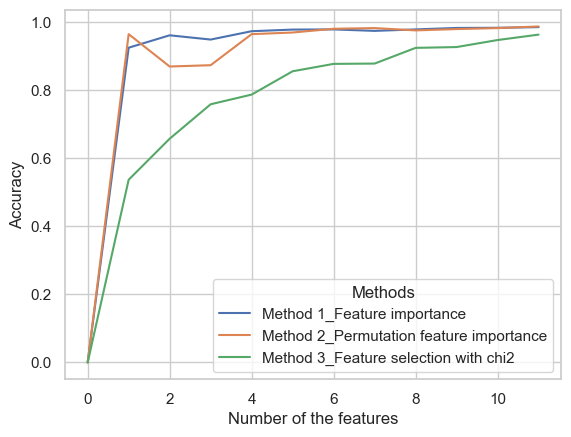

In [24]:
# Illustrate the comparison between the different feature importance selection methods for the first 15 features
sns.lineplot(x="Number of the features", y="Accuracy",
             hue="Methods",
             data=graph)
plt.xticks

In [25]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.9726487523992322


[<a href="#content">Back to top</a>]

## Hyper-parameter  tuning of RFC with four-feature dataset <a name="9"></a>

In [26]:
# https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/ 
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=19)
params = {
    'n_estimators': [50, 100, 200],                  # 100
    'criterion': ['gini', 'entropy', 'log_loss'],    #'gini'
    'max_depth': [None, 2, 5, 10, 20],               # None
    'min_samples_split': [2, 10, 20, 50],            # 2
    'min_samples_leaf': [1, 2, 10, 20, 50],          # 1
    'oob_score': [False, True]                       # False
    }     

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")
# %%time
grid_search.fit(X, y)

print("grid_search.best_score_", grid_search.best_score_)

rf_best = grid_search.best_estimator_
rf_best

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
grid_search.best_score_ 0.9970249520153551


RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [27]:
# Instantiate the model with the new hyperparameters
model=RandomForestClassifier(random_state=1, 
                            criterion='entropy',
                            n_estimators=200, 
                            n_jobs=-1) 
# Thrain the model
model.fit(X_train, y_train)
# Make a prediction
predicted = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, predicted)
print("The accuracy of the model with Random Forest Classifier algorithm is: ", accuracy)

The accuracy of the model with Random Forest Classifier algorithm is:  0.9745681381957774


In [28]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_auc_score
auc_ = roc_auc_score(y_test, predicted)
print("The Area Under the Curve (AUC) of the model with Random Forest Classifier algorithm is: ", auc_)

The Area Under the Curve (AUC) of the model with Random Forest Classifier algorithm is:  0.9746348778259202


In [29]:
# X_test.value_counts()
# y_test.values
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 1032, 1: 1052}

[<a href="#content">Back to top</a>]

## Scrutinising for  overfitting of the four-feature model <a name="10"></a>

In [30]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 25)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.650, test: 0.635
>2, train: 0.680, test: 0.675
>3, train: 0.721, test: 0.724
>4, train: 0.798, test: 0.796
>5, train: 0.811, test: 0.807
>6, train: 0.875, test: 0.870
>7, train: 0.898, test: 0.884
>8, train: 0.918, test: 0.898
>9, train: 0.942, test: 0.915
>10, train: 0.956, test: 0.933
>11, train: 0.968, test: 0.941
>12, train: 0.977, test: 0.951
>13, train: 0.985, test: 0.959
>14, train: 0.992, test: 0.964
>15, train: 0.995, test: 0.963
>16, train: 0.995, test: 0.966
>17, train: 0.998, test: 0.967
>18, train: 0.998, test: 0.972
>19, train: 0.999, test: 0.972
>20, train: 0.999, test: 0.968
>21, train: 0.999, test: 0.970
>22, train: 0.999, test: 0.970
>23, train: 0.999, test: 0.969
>24, train: 0.999, test: 0.972


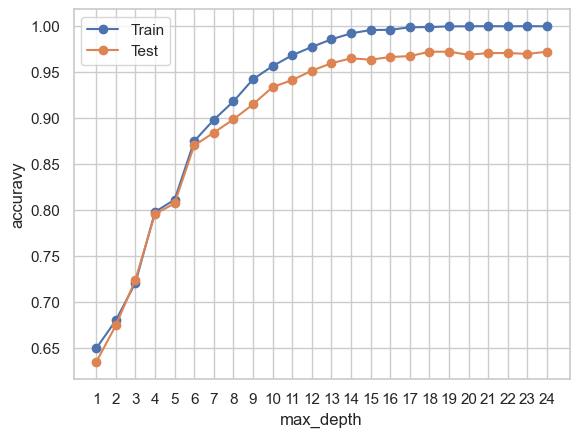

In [31]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix and classification report of RFC with four-feature dataset  <a name="11"></a>

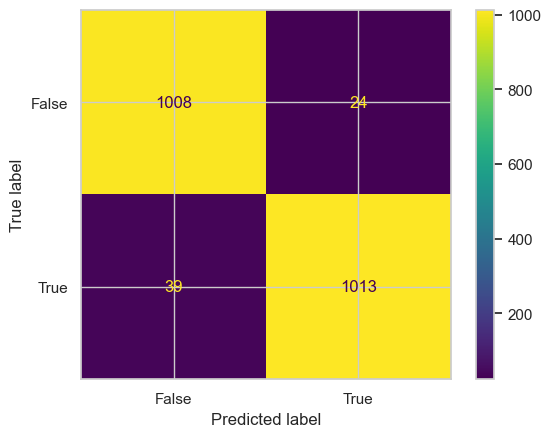

In [32]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = RandomForestClassifier(max_depth=20, random_state=42).fit(X_train,y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.96      0.98      0.97      1032
Inactive (target 0)       0.98      0.96      0.97      1052

           accuracy                           0.97      2084
          macro avg       0.97      0.97      0.97      2084
       weighted avg       0.97      0.97      0.97      2084



[<a href="#content">Back to top</a>]

## Illustration of the four-feature model results. <a name="12"></a>

In [34]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(predicted.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Display the resulted data frame 
final_output

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2079,0,0
2080,1,1
2081,1,1
2082,1,1


[<a href="#content">Back to top</a>]

## Machine Learning with molecular weight data only <a name="13"></a>

In [35]:
# Asign only MW column to X
X_MW = X[['MW']]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train_2, y_test_2 = train_test_split(X_MW, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = RandomForestClassifier().fit(X_train, y_train)

# Predict 
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.7787907869481766


[<a href="#content">Back to top</a>]

## Scrutinising for  overfitting of the molecular weight model <a name="14"></a>

In [36]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.534, test: 0.538
>2, train: 0.594, test: 0.597
>3, train: 0.595, test: 0.599
>4, train: 0.596, test: 0.605
>5, train: 0.616, test: 0.620
>6, train: 0.627, test: 0.623
>7, train: 0.646, test: 0.629
>8, train: 0.660, test: 0.636
>9, train: 0.702, test: 0.659
>10, train: 0.733, test: 0.679
>11, train: 0.764, test: 0.699
>12, train: 0.799, test: 0.716
>13, train: 0.825, test: 0.729
>14, train: 0.857, test: 0.743
>15, train: 0.858, test: 0.736
>16, train: 0.879, test: 0.742
>17, train: 0.906, test: 0.759
>18, train: 0.920, test: 0.767
>19, train: 0.932, test: 0.770
>20, train: 0.947, test: 0.772


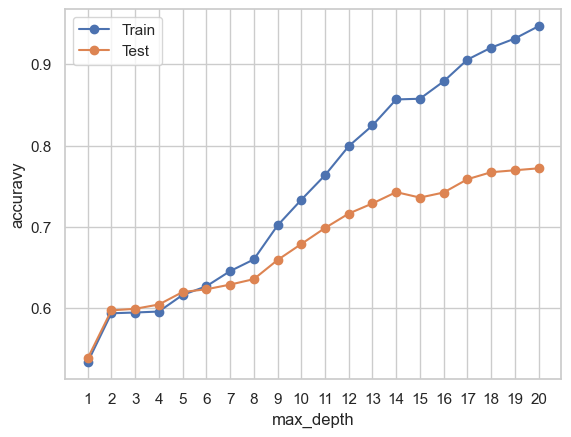

In [37]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix and classification report of RFC with molecular weight data.  <a name="15"></a>

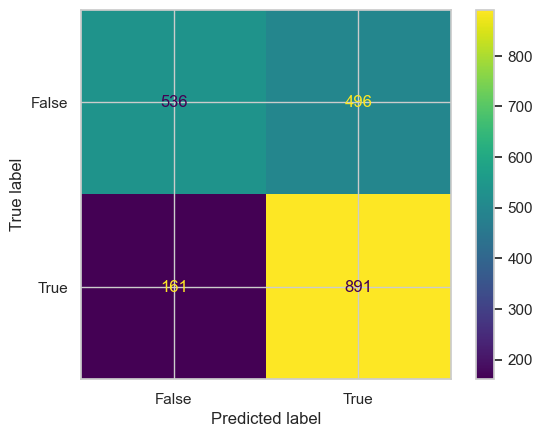

In [38]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = RandomForestClassifier(
                            max_depth=10,
                            random_state=42).fit(X_train,y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [39]:
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.77      0.52      0.62      1032
Inactive (target 0)       0.64      0.85      0.73      1052

           accuracy                           0.68      2084
          macro avg       0.71      0.68      0.68      2084
       weighted avg       0.71      0.68      0.68      2084



[<a href="#content">Back to top</a>]

## Illustration of the molecular weight model results <a name="16"></a>

In [40]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(predicted.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Display the resulted data frame 
final_output

,Real Values,Predicted Values
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
...,...,...
2079,0,1
2080,1,1
2081,1,1
2082,1,1


[<a href="#content">Back to top</a>]

## Machine Learning with the water solubility data only <a name="17"></a>

In [41]:
# Asign only MW column to X
X_Solubility = X[['Solubility_at_pH_7_4']]

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_Solubility, y,
                                                    test_size=0.20,
                                                    random_state=5) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Instantiate and train a model
model = RandomForestClassifier().fit(X_train, y_train)

# Predict 
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print('Accuracy of the model with reduced number of the features', acc)

Accuracy of the model with reduced number of the features 0.8430902111324377


[<a href="#content">Back to top</a>]

## Scrutinising for  overfitting of the water solubility data model <a name="18"></a>

In [42]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.564, test: 0.563
>2, train: 0.597, test: 0.591
>3, train: 0.606, test: 0.593
>4, train: 0.642, test: 0.638
>5, train: 0.645, test: 0.639
>6, train: 0.648, test: 0.635
>7, train: 0.664, test: 0.647
>8, train: 0.682, test: 0.657
>9, train: 0.696, test: 0.663
>10, train: 0.727, test: 0.684
>11, train: 0.742, test: 0.697
>12, train: 0.763, test: 0.708
>13, train: 0.798, test: 0.734
>14, train: 0.813, test: 0.745
>15, train: 0.832, test: 0.759
>16, train: 0.848, test: 0.785
>17, train: 0.859, test: 0.788
>18, train: 0.868, test: 0.807
>19, train: 0.876, test: 0.813
>20, train: 0.882, test: 0.819


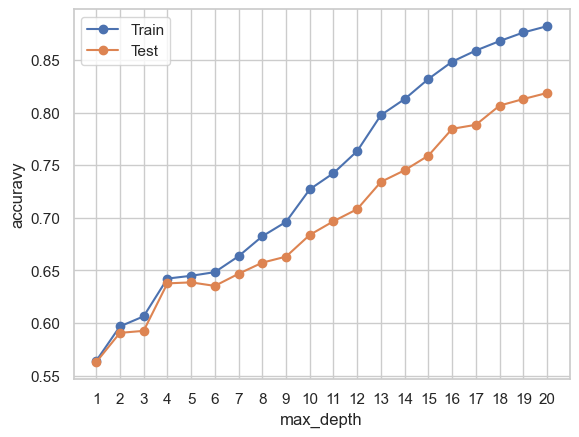

In [43]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]

## Confusion matrix and classification report of RFC with water solubility data  <a name="19"></a>

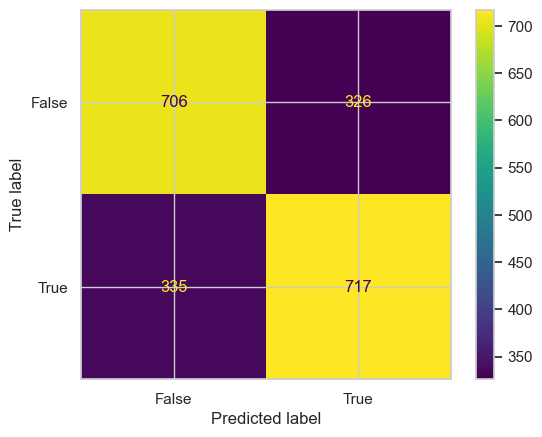

In [44]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Random forest classifier prediction
predicted = RandomForestClassifier(max_depth=10,
                                   random_state=42).fit(X_train,y_train).predict(X_test)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [45]:
from sklearn.metrics import classification_report

# Print the classification report 
target_names = ['Active (target 1) ', 'Inactive (target 0)']
print(classification_report(y_test, predicted, target_names=target_names))

                     precision    recall  f1-score   support

 Active (target 1)        0.68      0.68      0.68      1032
Inactive (target 0)       0.69      0.68      0.68      1052

           accuracy                           0.68      2084
          macro avg       0.68      0.68      0.68      2084
       weighted avg       0.68      0.68      0.68      2084



[<a href="#content">Back to top</a>]

## Illustration of the water solubility model results  <a name="20"></a>

In [46]:
# Create a data frame with the test values 
data_verify=pd.DataFrame(y_test.tolist(),columns=["Real Values"])

# Create a data frame with the values predicted 
data_predicted=pd.DataFrame(predicted.tolist(),columns=["Predicted Values"])

# Concatenate the data frames with the test and the values predicted
final_output=pd.concat([data_verify,data_predicted],axis=1)

# Display the resulted data frame 
final_output

,Real Values,Predicted Values
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1
...,...,...
2079,0,0
2080,1,0
2081,1,1
2082,1,1


[<a href="#content">Back to top</a>]